# 实验五 层次聚类
- 姓名：管昀玫
- 学号：2013750
- 专业：计算机科学与技术

## 基本要求
1. 实现single-linkage层次聚类算法
2. 实现complete-linkage层次聚类算法

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from itertools import permutations
import os

### 生成数据
数据包含2000个样例，每个样例的前3列表示特征，第4列表示标签。

聚类的中心点分别为：$m_1=[1,1,1],m_2=[1,3,3],m_3=[3,6,5],m_4=[2,6,8]$，标准差为$0.5$。

In [17]:
def create_data(centers,num=100,std=0.7):
    '''
    生成用于聚类的数据集
    :param centers: 聚类的中心点组成的数组。如果中心点是二维的，则产生的每个样本都是二维的。
    :param num: 样本数
    :param std: 每个簇中样本的标准差
    :return: 用于聚类的数据集。是一个元组，第一个元素为样本集，第二个元素为样本集的真实簇分类标记
    '''
    X, labels_true = make_blobs(n_samples=num, centers=centers, cluster_std=std)
    return  X,labels_true


def plot_data(*data, method='single linkage'):
    '''
    绘制用于聚类的数据集
    :param data: 可变参数。它是一个元组。元组元素依次为：第一个元素为样本集，第二个元素为样本集的真实簇分类标记，第三个元素为预测分类标记
    :return: None
    '''
    X,labels_true,labels_predict,cnt=data
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    colors='rgbyckm' # 每个簇的样本标记不同的颜色
    markers='o^sP*DX'
    for i in range(len(labels_true)):
        predict=labels_predict[i]
        ax.scatter(X[i,0],X[i,1],label="cluster %d"%labels_true[i],
        color=colors[predict%len(colors)],marker=markers[labels_true[i]%len(markers)],alpha=0.5)
    ax.set_title(method)
    
centers=[[1,1,1],[1,3,3],[3,6,5],[2,6,8]]# 用于产生聚类的中心点, 聚类中心的维度代表产生样本的维度
X,labels_true= create_data(centers,2000,0.5) # 产生用于聚类的数据集，聚类中心点的个数代表类别数
np.savetxt('./data/data.dat',X)
np.savetxt('./data/label.dat',labels_true)
print("generate data finish!")

generate data finish!


### 实现single-linkage层次聚类算法
方法是将两个组合数据点中距离最近的两个数据点间的距离作为这两个组合数据点的距离。这种方法容易受到极端值的影响。两个很相似的组合数据点可能由于其中的某个极端的数据点距离较近而组合在一起。

最短距离 / 单连接 (single linkage):  $G_p$  的样本与 $G_q$ 的样本之间的所有距离中的最短距离
$$
D_{pq}=min\{d_{ij}|x_i \in G_p, x_j \in G_q\}
$$
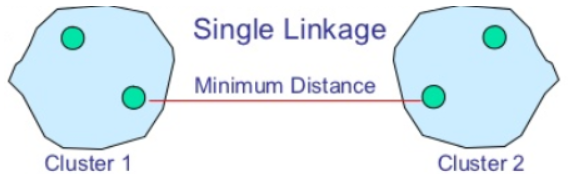

In [4]:
MAX_NUM = 1e3

# method
def singleLinkage(X, init):
    if init:
        return np.min(X)
    return np.min(X, axis=0)

### 实现complete-linkage层次聚类算法
Complete Linkage的计算方法与Single Linkage相反，将两个组合数据点中距离最远的两个数据点间的距离作为这两个组合数据点的距离。Complete Linkage的问题也与Single Linkage相反，两个不相似的组合数据点可能由于其中的极端值距离较远而无法组合在一起。

最长距离 / 全连接 (complete linkage):$G_p$  的样本与 $G_q$ 的样本之间的所有距离中的最长距离
$$
D_{pq}=max\{d_{ij}|x_i \in G_p, x_j \in G_q\}
$$
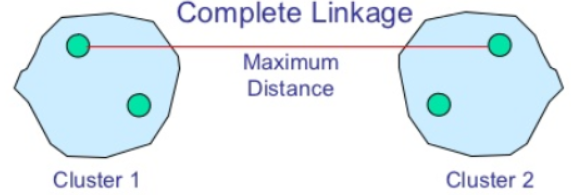

In [5]:
def completeLinkage(X, init):
    if init:
        return np.max(X)
    return np.max(X, axis=0)

## 中级要求
1. 实现average-linkage层次聚类算法
2. 将上述三种算法的性能进行简要对比

### 实现average-linkage层次聚类算法
Average Linkage的计算方法是计算两个组合数据点中的每个数据点与其他所有数据点的距离。将所有距离的均值作为两个组合数据点间的距离。这种方法计算量比较大，但结果比前两种方法更合理。

平均距离 (average linkage):  $G_p $ 与  $G_q$  任意两个样本之间距离的平均值
$$
D_{pq}=\frac{1}{n_p n_q} \sum_{x_i \in F_p} \sum_{x_j \in G_q}d_{ij}
$$
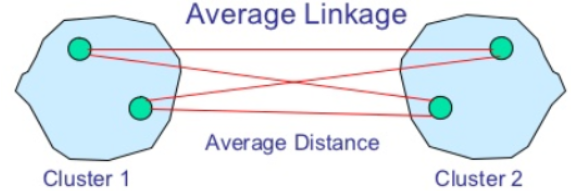

In [6]:
def averageLinkage(X, init):
    if init:
        return np.average(X)
    return np.average(X, axis=0)

### 相似性计算方法
- Pearson 相关系数: $\rho_{i j}=\frac{\sum_{k=1}^{m} \; \left(x_{k i}-\bar{x}_{i}\right)\left(x_{k j}-\bar{x}_{j}\right)}{\sqrt{\sum_{k=1}^{m} \; \left(x_{k i}-\bar{x}_{i}\right)^{2}}  \; \sqrt{\sum_{k=1}^{m} \; \left(x_{k j}-\bar{x}_{j}\right)^{2}}}$</li>
- 余弦相似度 (Cosine similarity): $s_{i j}=\frac{\sum_{k=1}^{m} \; x_{k i} \;  x_{k j}}{\sqrt{\sum_{k=1}^{m} \; x_{k i}^{2}}  \; \sqrt{\sum_{k=1}^{m} \; x_{k j}^{2}}}$ </li>

越接近于 1，表示样本越相似；越接近于 0，表示样本越不相似。

用相似性度量时，相关系数越大 样本越相似。

### 计算距离方法
衡量两个对象之间的距离的方式有多种，对于数值类型（Numerical）的数据，常用的距离衡量准则有 Euclidean 距离、Manhattan 距离、Chebyshev 距离、Minkowski 距离等等。
<ul>
<li><p>闵可夫斯基距离 (Minkowski): $ d_{i j}=\left(\sum_{k=1}^{m}\left|x_{k i}-x_{k j}\right|^{p}\right)^{\frac{1}{p}} $</p>
<p>$ p=2 $, 欧式距离; $ p=1 $, 曼哈顿距离; $ p=\infty$ , 切比雪夫距离</p>
</li>
</ul>
<p>用距离度量时, 距离越小 样本越相似。</p>

### 距离与相关系数
<img src="https://s2.loli.net/2022/10/23/BgN5kEv73LUWGXR.png" style="zoom: 55%;" />
如果从距离的⻆度看，A 和 B 比 A 和 C 更相似；但是从相关系数的⻆度看，A 和 C 比 A 和 B 更相似。所以进行聚类时，选择合适的距离或相似度非常重要！</p>

### 层次聚类

层次聚类算法(Hierarchical Clustering)将数据集划分为一层一层的clusters，后面一层生成的clusters基于前面一层的结果。层次聚类算法一般分为两类：

- Divisive 层次聚类：又称自顶向下（top-down）的层次聚类，最开始所有的对象均属于一个cluster，每次按一定的准则将某个cluster 划分为多个cluster，如此往复，直至每个对象均是一个cluster。
- Agglomerative 层次聚类：又称自底向上（bottom-up）的层次聚类，每一个对象最开始都是一个cluster，每次按一定的准则将最相近的两个cluster合并生成一个新的cluster，如此往复，直至最终所有的对象都属于一个cluster。

In [9]:
class AgglomerativeClustering:
    def __init__(self):
        # 对每次的合并进行记录
        self.steps=[]

    def fit(self,datas,method):
        self.dataCnt = datas.shape[0]
        # 预处理各点之间的距离
        allDist = np.zeros((self.dataCnt,self.dataCnt))
        for i in range(self.dataCnt):
            for j in range(i):
                allDist[i][j] = allDist[j][i] = np.sum((datas[i]-datas[j])**2)
        setList, clusterCount = [[i] for i in range(self.dataCnt)], self.dataCnt
        print("calculate distance finish!")

        # 聚类间距离矩阵
        clusterDist = np.zeros((self.dataCnt,self.dataCnt))+ MAX_NUM
        for i in range(clusterCount):
            for j in range(i+1,clusterCount):
                clusterDist[i][j] = clusterDist[j][i] = allDist[i][j]
        print("calculate cluster distance finish!")

        while clusterCount != 1:
            # 最相似的两个聚类
            res = np.argmin(clusterDist)
            dest,src = int(res / clusterCount),res % clusterCount
            # steps进行一次记录
            self.steps.append((setList[dest][0],setList[src][0]))
            # 聚类间距离矩阵更新
            modify = method(clusterDist[[dest,src]], False)
            clusterDist[dest] = modify
            clusterDist[:,dest] = modify
            clusterDist = np.delete(clusterDist,src,axis=0)
            clusterDist = np.delete(clusterDist,src,axis=1)
            clusterDist[dest][dest] = MAX_NUM
            # 聚类更新
            setList[dest] = setList[dest] + setList[src]
            del setList[src]
            clusterCount -= 1
            if (self.dataCnt - clusterCount) % (self.dataCnt / 20) == 0:
                print(clusterCount, " clusters left.")

        print("cluster finish !")

    def label(self,k):
        root = list(range(self.dataCnt))
        def find_root(n):
            if root[root[n]] == root[n]:
                return root[n]
            root[n]=find_root(root[n])
            return root[n]
        for i in range(self.dataCnt-k): # 根据steps记录产生非连通图
            src,dest = self.steps[i]
            root[find_root(dest)] = find_root(src)
        cluster, clusterNum = [0 for i in range(self.dataCnt)], 0
        for i in range(self.dataCnt): # 将根节点标注为新的cluster
            if i == root[i]: # i是根
                clusterNum += 1
                cluster[i] = clusterNum
        for i in range(self.dataCnt): # 将非根节点标注为根节点的cluster
            if i != root[i]: # i不是根
                cluster[i] = cluster[find_root(i)]
        return cluster

In [15]:
def cal_acc(pred, true):
    correct = 0
    for i in range(len(pred)):
        if pred[i] == true[i]:
            correct += 1
    return correct/len(pred)

In [28]:
def recal_label(labels_true,prediction, method):
    accs = []
    pred_labels = []
    cases = [x for x in range(k)]
    cases = permutations(cases) # 0、1、2、3四种标签的排列情况
    for case in cases:
        pred_label = np.zeros(len(labels_true))
        for i in range(case.__len__()):
            pred_label[prediction[i]] = case[i]
        pred_labels.append(pred_label)
        acc = cal_acc(pred_label, labels_true)
        accs.append(acc)
    print(accs)
    acc = max(accs) # 将排列中准确度最高的情况作为预测标签
    print(method,"准确率为：",acc)
    return acc

In [38]:
def recal_label(labels_true,prediction,method):
    accs = []
    pred_labels = []
    cases = [x for x in range(k)]
    cases = permutations(cases) # 0、1、2、3四种标签的排列情况
    for case in cases:
        pred_label = np.zeros(len(prediction))
        temp = prediction[0]
        counted_label = []
        for i in range(case.__len__()):
            for j in range(len(prediction)):
                if prediction[j] == temp:
                    pred_label[j] = case[i] # 更改标签
            counted_label.append(temp)
            for j in range(len(prediction)):
                if temp != prediction[j] and (prediction[j] not in counted_label): # 寻找下一个标签
                    temp = prediction[j]
                    break
        pred_labels.append(pred_label)
        acc = cal_acc(pred_label, labels_true)
        accs.append(acc)
    acc = np.max(accs) # 将排列中准确度最高的情况作为预测标签
    print(method,"准确率为：",acc)
    pred_label = pred_labels[np.argmax(accs)]
    return acc

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
Single-Linkage 准确率为： 0.501
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
Complete

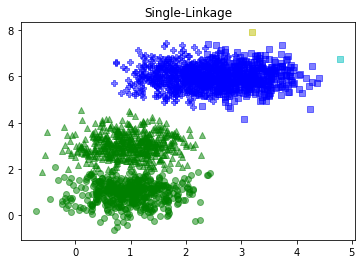

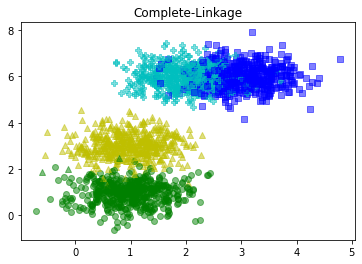

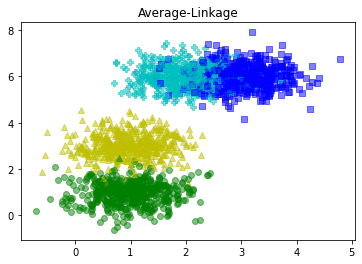

In [39]:
METHOD_APPLY = [singleLinkage,completeLinkage,averageLinkage]

cnt=0
for method in METHOD_APPLY:
    if method == singleLinkage:
        mtd = "Single-Linkage"
    elif method == completeLinkage:
        mtd = "Complete-Linkage"
    else:
        mtd = "Average-Linkage"
    model = AgglomerativeClustering()
    model.fit(X,method)
    k=4
    plot_data(X,labels_true,model.label(k),cnt, method = mtd)
    recal_label(labels_true, model.label(k), mtd)
    # print("%s 的准确率为%d"%(mtd, acc))
    cnt+=1
    print("-------Segmentation-------")

### 性能对比
从上到下分别为k = 4时的single-linkage, complete-linkage, average-linkage。

- 从图中可以看出，由于single-linkage中存在孤立点，故该算法的性能没有另外两个强，准确率仅有0.501。
- complete-linakge和average-linakge相比，average-linkage在处理边缘和交界处的数据并不太好，导致左下方有部分数据混合（蓝色数据中混有大量绿色数据）。
- 在k = 4时，三种聚类算法中，complete-linkage和average-linkage算法的性能表现最为优秀，准确率达到0.996。

### 总结
 Single-link 定义两个 cluster 之间的距离为两个 cluster 之间距离最近的两个对象间的距离，这样在聚类的过程中就可能出现链式效应，即有可能聚出长条形状的 cluster；而 Complete-link 则定义两个 cluster 之间的距离为两个 cluster 之间距离最远的两个对象间的距离，这样虽然避免了链式效应，但其对异常样本点（不符合数据集的整体分布的噪声点）却非常敏感，容易产生不合理的聚类。

## 高级要求
通过变换聚类簇的个数，测试上述三种算法的性能，并给出分析；

令k分别为1,2,3,4，并应用single-linkage/complete-linkage/average-linkage算法进行性能测试

calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters left.
1200  clusters left.
1100  clusters left.
1000  clusters left.
900  clusters left.
800  clusters left.
700  clusters left.
600  clusters left.
500  clusters left.
400  clusters left.
300  clusters left.
200  clusters left.
100  clusters left.
cluster finish !
Single-Linkage 准确率为： 0.2505
-------Segmentation-------
Single-Linkage 准确率为： 0.251
-------Segmentation-------
Single-Linkage 准确率为： 0.4995
-------Segmentation-------
Single-Linkage 准确率为： 0.501
-------Segmentation-------
Single-Linkage 准确率为： 0.501
-------Segmentation-------
Single-Linkage 准确率为： 0.501
-------Segmentation-------
calculate distance finish!
calculate cluster distance finish!
1900  clusters left.
1800  clusters left.
1700  clusters left.
1600  clusters left.
1500  clusters left.
1400  clusters left.
1300  clusters le

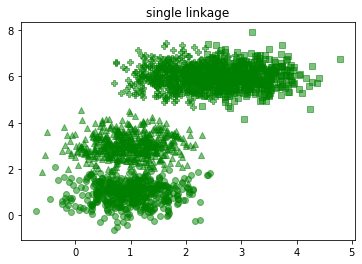

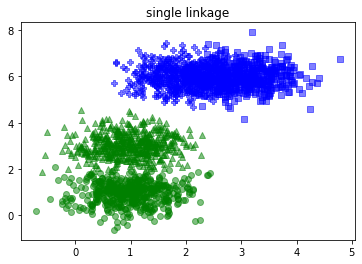

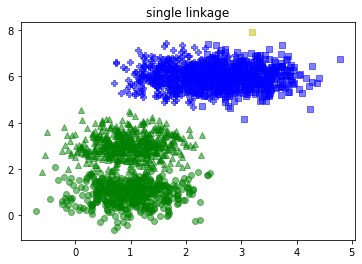

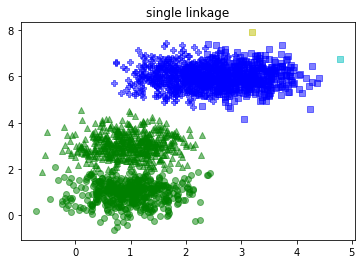

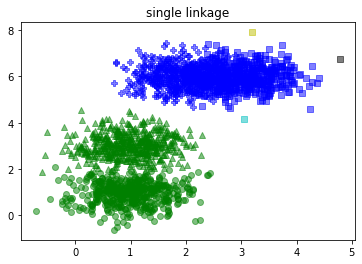

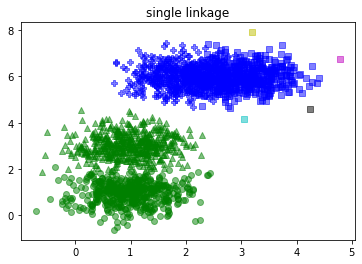

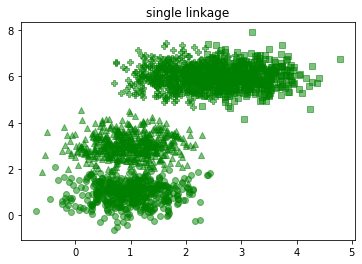

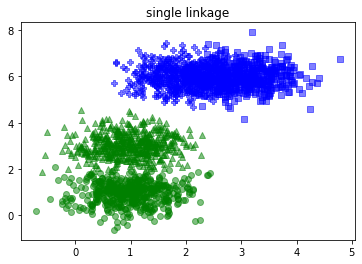

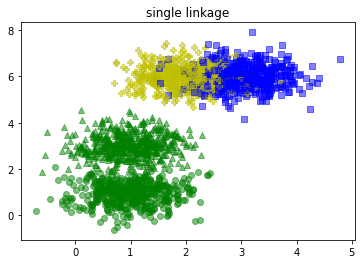

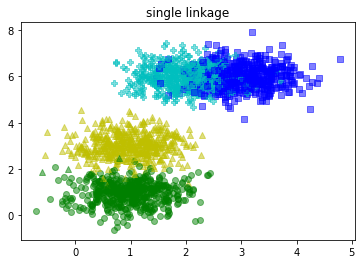

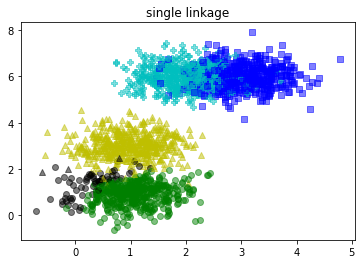

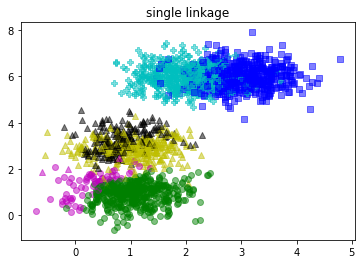

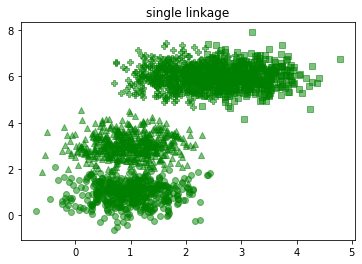

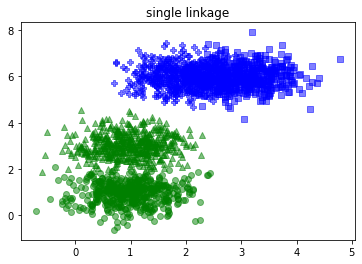

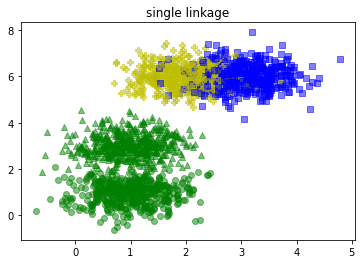

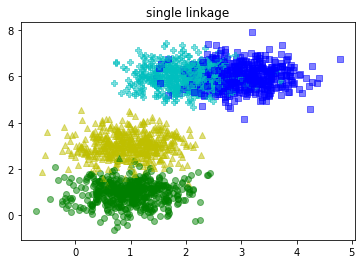

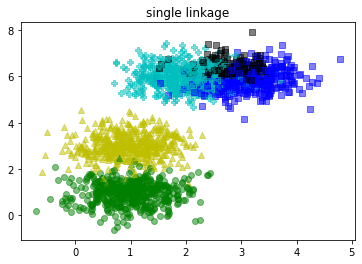

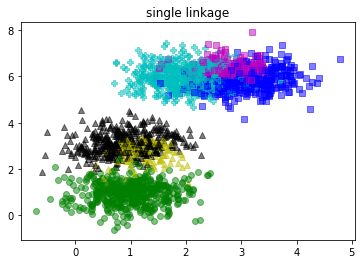

In [40]:
cnt=0
for method in METHOD_APPLY:
    if method == singleLinkage:
        mtd = "Single-Linkage"
    elif method == completeLinkage:
        mtd = "Complete-Linkage"
    else:
        mtd = "Average-Linkage"
    model = AgglomerativeClustering()
    model.fit(X,method)
    for k in [1, 2, 3, 4, 5, 6]:
        plot_data(X, labels_true, model.label(k), cnt)
        recal_label(labels_true, model.label(k), mtd)
        cnt += 1
        print("-------Segmentation-------")

### 性能分析
从上至下分别为：
1. single-linkage, k = [1,2,3,4,5,6]
2. complete-linkage, k = [1,2,3,4,5,6]
3. average-linkage, k = [1,2,3,4,5,6]

从图中可以看出：
1. k = 1时，所有数据分在一起，无差别
2. k = 2时，三种算法的分类倾向大致相同
3. k = 3时，single-linkage不能很好地区分出第三个类；complete-linkage先将右上方的类做出区分；average-linkage先将左下方的类做出区分
4. k = 4时，complete-linkage和average-linkage都可以很好地区分出4个类，但是single-linkage仍然只能区分出两个类。在k = 4时，各个方法的准确率达到顶峰。其中，single-linkage方法的准确率为0.501，complete-linkage方法的准确率为0.996，average-linkage方法的准确率为0.996。
5. k > 4时，三个方法的准确率都下降。因为本来就只有4个类，却强行分了大于4个类，准确率必然要下降。

### 总结

综上所述，single-linkage 方法下的层次聚类结果最差，它仅仅区分出2个cluster，而不能像另外两个算法一样区分出4个cluster，这充分体现了 single-linkage 方法下的“链式效应”，也体现了 Agglomerative 算法的一个特点，即“赢者通吃”（rich getting richer）： Agglomerative 算法倾向于聚出不均匀的类，尺寸大的类倾向于变得更大。由于本次实验的样本集较为理想，因此除了 Single-link 之外的其他方法都表现地还可以，但当样本集变复杂时，上述“赢者通吃” 的特点会显现出来。

- SingleLinkage容易造成两个聚类明明从“大局”上离得比较远，但是由于其中个别的点距离比较近就被合并了，并且这样合并之后这种情况会进一步扩大，最后会得到比较松散的聚类 。
- CompleteLinkage会导致两个 cluster 即使已经很接近了，但是只要有不配合的点存在，就不会合并。这两种相似度的定义方法的共同问题就是指考虑了某个有特点的数据，而没有考虑类内数据的整体特点。
- Average-linkage：这种方法就是把两个集合中的点两两的距离全部放在一起求一个平均值，相对也能得到合适一点的结果。考虑了整体情况，不会因为某些极端值或边界上的点影响整体结果。